In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

2026-02-22 12:43:26.527058: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Loading and Visualizing the data

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


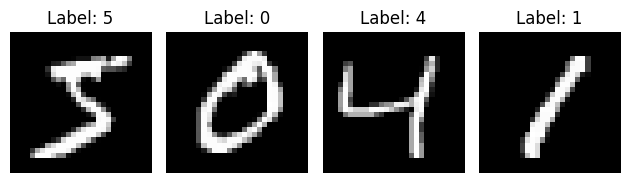

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# print(x_train[0])
# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0


print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

### Making the NN and Training it

/home/ardo/mlem/Study/Sem8/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1771744411.219434    3946 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2613 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


Epoch 1/5


2026-02-22 12:43:33.110712: I external/local_xla/xla/service/service.cc:163] XLA service 0x7ff5e40064c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-02-22 12:43:33.110738: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2026-02-22 12:43:33.131126: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-02-22 12:43:33.237989: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91900


  73/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5344 - loss: 1.5844

I0000 00:00:1771744414.024603    5416 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9151 - loss: 0.2994 - val_accuracy: 0.9469 - val_loss: 0.1842
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9537 - loss: 0.1574 - val_accuracy: 0.9603 - val_loss: 0.1395
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9647 - loss: 0.1190 - val_accuracy: 0.9686 - val_loss: 0.1106
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9713 - loss: 0.0990 - val_accuracy: 0.9692 - val_loss: 0.1042
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9751 - loss: 0.0855 - val_accuracy: 0.9715 - val_loss: 0.0954
313/313 - 1s - 2ms/step - accuracy: 0.9715 - loss: 0.0954
Test accuracy: 0.9714999794960022


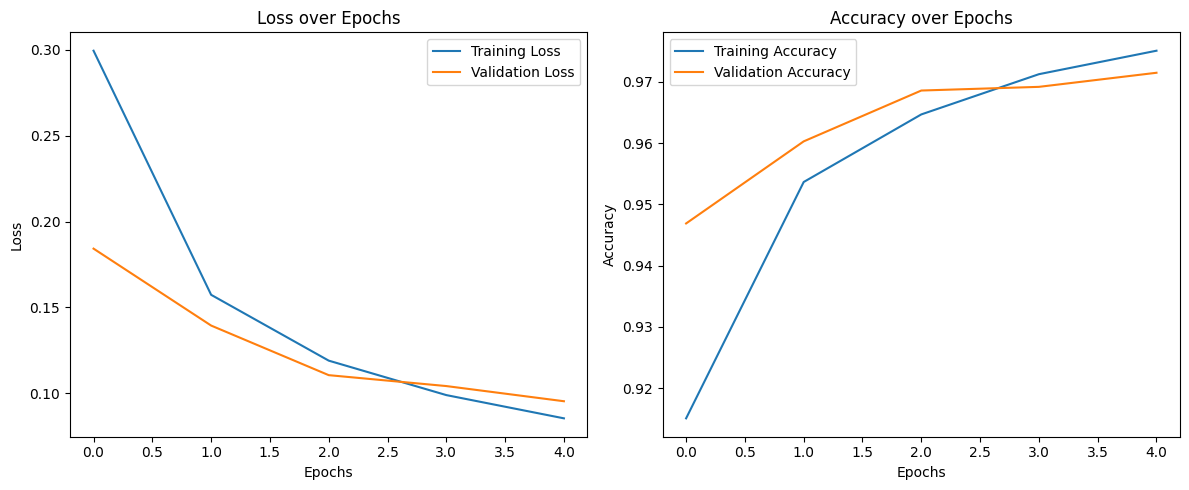

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy}')

train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot test and training accuracy and loss

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()



#### Saving the weights and printing them 

In [5]:
model.save_weights("mnist.weights.h5")

In [6]:
import h5py

file = h5py.File("mnist.weights.h5", "r")

for key in file.keys():
    print(key)

def print_structure(name, obj):
    print(name)

file.visititems(print_structure)

layers
optimizer
vars
layers
layers/dense
layers/dense/vars
layers/dense/vars/0
layers/dense/vars/1
layers/dense_1
layers/dense_1/vars
layers/dense_1/vars/0
layers/dense_1/vars/1
layers/flatten
layers/flatten/vars
optimizer
optimizer/vars
optimizer/vars/0
optimizer/vars/1
optimizer/vars/2
optimizer/vars/3
optimizer/vars/4
optimizer/vars/5
vars


In [7]:
import numpy as np

kernel1 = np.array(file["layers"]["dense"]["vars"]["0"][:])
bias1 = np.array(file["layers"]["dense"]["vars"]["1"][:])

kernel2 = np.array(file["layers"]["dense_1"]["vars"]["0"][:])
bias2 = np.array(file["layers"]["dense_1"]["vars"]["1"][:])

print(kernel1.shape)
print(bias1.shape)

print(kernel2.shape)
print(bias2.shape)

(784, 64)
(64,)
(64, 10)
(10,)


##### Weights for first hidden layer

In [8]:
kernel1[:,0]


array([ 0.05785387,  0.06126907, -0.06040148, -0.03314932, -0.02935267,
        0.04855099,  0.06651143, -0.0478535 , -0.061971  ,  0.063743  ,
        0.07575717,  0.0809074 , -0.05531967,  0.01642122, -0.02625411,
        0.04702178, -0.05995038,  0.07067377, -0.06074563,  0.07861494,
        0.05203278,  0.04822563, -0.0179107 ,  0.0126896 ,  0.04201782,
        0.06461424,  0.05151271,  0.08351215,  0.04611076,  0.04612761,
       -0.03623631,  0.03384224,  0.02634885,  0.00207525,  0.01223861,
       -0.07715715, -0.11138967, -0.08175527,  0.05259803, -0.01866785,
       -0.0313121 , -0.02109507, -0.05757235,  0.02004464, -0.02421239,
        0.03521778, -0.00924272,  0.05959337,  0.05482621,  0.06979631,
       -0.04342731, -0.09558365,  0.031716  , -0.08061336, -0.03822903,
       -0.05410622,  0.04017136, -0.00738525,  0.00119475, -0.03082484,
        0.04184728,  0.06427486, -0.1117468 , -0.10864063, -0.11602291,
       -0.09097174, -0.09860453, -0.22845803, -0.18556206, -0.23

##### Bias for first hidden layer

In [9]:
bias1

array([ 0.09515617, -0.16854578,  0.03957985, -0.24464414,  0.05953605,
       -0.02980527,  0.07394806,  0.07802063,  0.1404661 , -0.20266764,
       -0.2214548 , -0.14675654, -0.08690672, -0.01978087, -0.20430289,
       -0.18470758, -0.14021622,  0.2739049 , -0.04149286, -0.28260082,
        0.04863944, -0.26252422, -0.01987718,  0.06257852, -0.08743436,
       -0.00833195,  0.02790745, -0.0480802 ,  0.04092814,  0.11087266,
       -0.13375452,  0.24066186,  0.21312635,  0.02178879,  0.01021563,
       -0.10557787, -0.26352847, -0.0496706 ,  0.00921682,  0.12007748,
       -0.01713181, -0.20537436,  0.07473799,  0.0714574 , -0.01302372,
       -0.11763341, -0.11212406, -0.20765932,  0.05033552, -0.22951198,
       -0.06027036, -0.02396407, -0.13383946, -0.29678857,  0.0465657 ,
       -0.18066223, -0.10719177,  0.02805756,  0.04770682, -0.2824266 ,
        0.01409796, -0.0022136 , -0.05507494, -0.23943992], dtype=float32)

---


### Using a double hidden layer 16 neuron architecture

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy}')



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8717 - loss: 0.4414 - val_accuracy: 0.9160 - val_loss: 0.2837
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9278 - loss: 0.2499 - val_accuracy: 0.9338 - val_loss: 0.2287
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9379 - loss: 0.2176 - val_accuracy: 0.9394 - val_loss: 0.2066
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9428 - loss: 0.1992 - val_accuracy: 0.9424 - val_loss: 0.1992
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9463 - loss: 0.1852 - val_accuracy: 0.9426 - val_loss: 0.1965
313/313 - 1s - 2ms/step - accuracy: 0.9426 - loss: 0.1965
Test accuracy: 0.9426000118255615
